# **<center>This is a live paper guide for the CAMA workshop at AGILE 2022<center>**

## <center> Author 1 <sup>1</sup>, Author 2 <sup>2</sup>, Author 3 <sup>2</sup> <center>

### <center>  <sup>1 Author 1 institution, e-mail<center>
### <center>  <sup>2 Author 2 institution, e-mail<center>
### <center>  <sup>3 Author 3 institution, e-mail<center>







###**<center>ABSTRACT<center>**

<p align="justify"> All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text. All abstracts have a maximum of 100 words of text.</p>

####<p align="center"> **KEYWORDS**: keyword 1, keyword 2, keyword 3 </p>

###**<left> 1. RESEARCH QUESTION AND BACKGROUND<left>**
<p align="justify"> This section should include the research questions, hypotheses addressed in the article and a brief related literature background.</p>
<p align="justify"> To start a new paragraph use the wrapper around this sentence. Please click to see the wrappers as plain text. </p>



###**<left> 2 ENVIRONMENT CONFIGURATION <left>**
<p align="justify"> This section should show all library imports and installation when possible.</p>

In [ ]:
# Checking if Anacoinda is installed
!conda --version

In [1]:
# Anaconda was not installed. Setting up Anaconda in colab (CondaColab)
!pip install -q condacolab
import condacolab
condacolab.install()
!conda --version

✨🍰✨ Everything looks OK!
conda 4.9.2


In [ ]:
# Installing non-native libraries that we require
!conda install geopandas -q
!conda install movingpandas -q

In [4]:
# Importing required libraries
import io
from os.path import exists
from urllib.request import urlretrieve
import gzip
import shutil
from datetime import timedelta
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import hvplot.pandas 
import contextily as cx
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [11]:
# Generating a .yml file. This file should be submitted with the live paper.
!conda env export --name base -f environment.yml

###**<left> 3 DATA <left>**
<p align="justify"> This section should describe import and explain the datasets used. Write about the dataset as you would in a standard extended abstract. You can also include in this section any code relattin to data pre-processing. We use one of the data challenge datasets as an example here </p>

<p align="justify"> EXAMPLE: BBG_JUVENILE - Juvenile lesser black-backed gulls **negrito**(Larus fuscus, Laridae) hatched in Zeebrugge (Belgium) is a bird tracking dataset published by the Research Institute for Nature and Forest (INBO). It contains animal tracking data collected by the LifeWatch GPS tracking network for large birds (http://lifewatch.be/en/gps-tracking-network-large-birds) for the project/study LBBG_JUVENILE, using trackers developed by Ornitela (https://www.ornitela.com). The study has been operational since 2020. In total 50 individuals of Lesser black-backed gull (Larus fuscus) have been tagged shortly after fledging in the colony of Zeebrugge, mainly to study their habitat use and migration behaviour. Data are automatically synced with Movebank and from there periodically archived on Zenodo (see https://github.com/inbo/bird-tracking). </p>




In [12]:
# Defines a function to downlaod data  from Zenodo.
def download_from_zenodo(zip_file, url):
    if not exists(zip_file):
        urlretrieve(url, zip_file)

In [13]:
# Specifying the file name and downloading it from zenodo
gull_gz_file = 'LBBG_JUVENILE-gps-2020.csv.gz'
download_from_zenodo(gull_gz_file, 'https://zenodo.org/record/5075869/files/LBBG_JUVENILE-gps-2020.csv.gz?download=1')


In [14]:
# Unzipping the data
with gzip.open(gull_gz_file, 'rb') as f_in:
    with open('LBBG_JUVENILE_gps_2020.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [60]:
# Reading data into a dataframe and displaying the top of it
df = pd.read_csv('LBBG_JUVENILE_gps_2020.csv', nrows=10000)
df.head()

,event-id,visible,timestamp,location-long,location-lat,acceleration-raw-x,acceleration-raw-y,acceleration-raw-z,bar:barometric-height,battery-charge-percent,...,mag:magnetic-field-raw-x,mag:magnetic-field-raw-y,mag:magnetic-field-raw-z,orn:transmission-protocol,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,16419878986,True,2020-07-06 18:11:03.000,3.173282,51.345081,-307.0,-263.0,925.0,0.0,100,...,-0.069,-0.171,-0.087,GPRS,4157.0,gps,Larus fuscus,200552,L930074,LBBG_JUVENILE - Juvenile lesser black-backed g...
1,16419878987,True,2020-07-06 18:31:03.000,3.173318,51.345024,-430.0,136.0,909.0,0.0,100,...,-0.157,0.139,-0.015,GPRS,4157.0,gps,Larus fuscus,200552,L930074,LBBG_JUVENILE - Juvenile lesser black-backed g...
2,16419878988,True,2020-07-06 18:51:03.000,3.173450,51.344925,-549.0,222.0,825.0,0.0,100,...,-0.104,0.211,0.042,GPRS,4157.0,gps,Larus fuscus,200552,L930074,LBBG_JUVENILE - Juvenile lesser black-backed g...
3,16419878989,True,2020-07-06 19:11:03.000,3.173350,51.344971,-617.0,184.0,782.0,0.0,100,...,-0.125,0.223,0.103,GPRS,4157.0,gps,Larus fuscus,200552,L930074,LBBG_JUVENILE - Juvenile lesser black-backed g...
4,16419878990,True,2020-07-06 19:31:17.000,3.173407,51.344967,-178.0,-507.0,834.0,0.0,100,...,-0.224,-0.223,-0.055,GPRS,4157.0,gps,Larus fuscus,200552,L930074,LBBG_JUVENILE - Juvenile lesser black-backed g...


In [ ]:
# Converting timestamp to datetime type
df['t'] = pd.to_datetime(df['timestamp'])
df.drop(columns=['timestamp'])

In [62]:
# Transforming data into a moving pandas dataset resampled to 30 min
RESAMPLING_INTERVAL = timedelta(minutes=30)

df = df[['t', 'individual-local-identifier', 'location-long', 'location-lat','acceleration-raw-z','mag:magnetic-field-raw-z']]
df=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['location-long'], df['location-lat']))
df=df.set_crs('epsg:4326')
df=df.to_crs('epsg:3857')
tc = mpd.TrajectoryCollection(df, 'individual-local-identifier', x='location-long', y='location-lat', t='t')
tc = mpd.MinTimeDeltaGeneralizer(tc).generalize(tolerance=RESAMPLING_INTERVAL)

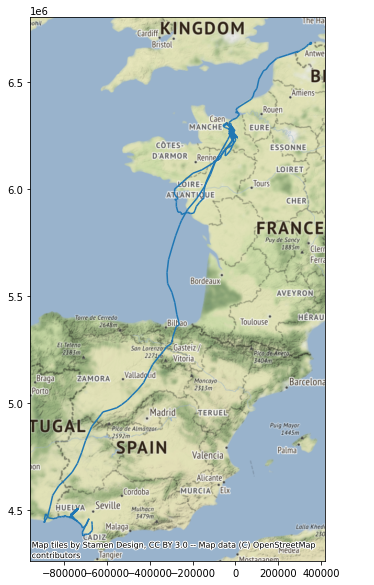

In [63]:
# Plotting the dataset
fig, ax = plt.subplots(1, 1, figsize=(15,10))
tc.plot(ax=ax)
cx.add_basemap(ax)

Figure 1 - Map showing Gull's flight pathways

###**<left> 4 METHODS <left>**
<p align="justify"> This section should describe and show the methods used. Write about the methods as you would in a standard extended abstract.  Then show the code that you used to perform the analysis </p>
<p align="justify"> EXAMPLE: We performed a linear regression to teste if  speed acceleration in Z could be explained by the vertical component of the magnetic field. </p>

In [64]:
# Creating a regression model to explain speend acceleration in Z
dados_clean= df.dropna(axis=1)
x=dados_clean[['acceleration-raw-z']]
y=dados_clean['mag:magnetic-field-raw-z']
X_sm= sm.add_constant(x)
results=sm.OLS(y,X_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###**<left> 5 FINDINGS <left>**
<p align="justify"> This section should describe you results, the answer to you research questions. Write about it as you would in a standard extended abstract.  Then use code to show data supportting your claims </p>
<p align="justify"> EXAMPLE: Our linear regression model indicated that the vertical component of the magnetic field alone is not a good predictor of speed acceleration in Z (Table 1). This results is in agreement with findings by [1]. </p>

Table 1 - Summary of the linear regression

In [66]:
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     mag:magnetic-field-raw-z   R-squared:                       0.028
Model:                                  OLS   Adj. R-squared:                  0.028
Method:                       Least Squares   F-statistic:                     289.7
Date:                      Tue, 29 Mar 2022   Prob (F-statistic):           4.60e-64
Time:                              11:36:22   Log-Likelihood:                 7161.6
No. Observations:                     10000   AIC:                        -1.432e+04
Df Residuals:                          9998   BIC:                        -1.430e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

###**<left> DATA STATEMENT <left>**
<p align="justify"> Please indicate in this where/how you will provide your dataset or an appropriate fake dataset, so that we can test your code </p>

###**<left> REFERENCES <left>**
<p align="justify"> [1] Camps, F., Harasse, S., & Monin, A. (2009). Numerical calibration for 3-axis accelerometers and magnetometers. IEEE International Conference on Electro/Information Technology.  </p>
<p align="justify"> [2] Portugal, S. J., & White, C. R. (2018). Miniaturization of biologgers is not alleviating the 5% rule. In Methods in Ecology and Evolution (Vol. 9, Issue 7, pp. 1662–1666). John Wiley & Sons, Ltd. https://doi.org/10.1111/2041-210X.13013 </p>

